In [1]:
#Import Important Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the First Dataset
df = pd.read_csv(r"C:/Users\user/Desktop/MAX/dataset_tk.csv")
df.rename(columns = {"Unnamed: 0" : "Date"}, inplace = True)
df['Date'] = pd.to_datetime(df["Date"], dayfirst = True)
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day
df.drop(["Date"], axis = 1, inplace = True)
df.head(2)

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,year,month,day
0,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,...,2.1,21.7,2.7,6.1,1.9,2.2,3.4,2019,1,2
1,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,...,2.2,23.4,2.4,6.5,1.8,2.2,3.6,2019,1,3


In [3]:
#Load the Second Dataset
df2 = pd.read_csv(r"C:\Users\user\Desktop\MAX\long_data_.csv")
df2['Date'] = pd.to_datetime(df2['Dates'], dayfirst = True)
df2['Year'] = df2['Date'].dt.year
df2['Month'] = df2['Date'].dt.month
df2['Day'] = df2['Date'].dt.day
df2.drop(['Date'], axis = 1, inplace = True)
df2.head()

,States,Regions,latitude,longitude,Dates,Usage,Year,Month,Day
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9,2019,1,2
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3,2019,1,2
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1,2019,1,2
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8,2019,1,2
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9,2019,1,2


In [4]:
#Analyzing Consumption by Region
Usage_2019 = dict()
for i in (df2.Regions.unique()):
    a = df2[(df2['Regions'] == i) & (df2['Year'] == 2019)]
    b = a.Usage.sum()
    Usage_2019.update({i : b})
print('Usage in 2019 :', Usage_2019)

Usage_2020 = dict()
for i in (df2.Regions.unique()):
    a = df2[(df2['Regions'] == i) & (df2['Year'] == 2020)]
    b = a.Usage.sum()
    Usage_2020.update({i : b})
print('Usage in 2020 :', Usage_2020 )

Usage in 2019 : {'NR': 358694.8, 'WR': 385280.5, 'SR': 338795.20000000007, 'ER': 117915.1, 'NER': 15519.7}
Usage in 2020 : {'NR': 147559.8, 'WR': 155089.3, 'SR': 137883.39999999997, 'ER': 46799.4, 'NER': 6190.7}


In [5]:
#Create Dataframes from the Dictionaries
table1 = pd.DataFrame.from_dict(Usage_2019, orient = "index")
table2 = pd.DataFrame.from_dict(Usage_2020, orient = 'index')
table2.head()

,0
NR,147559.8
WR,155089.3
SR,137883.4
ER,46799.4
NER,6190.7


In [6]:
#Renaming Columns
table1.rename(columns = {0: 'Total Consumption (2019)'}, inplace = True)
table2.rename(columns = {0: 'Total Consumption (2020)'}, inplace = True)
table2.head()

,Total Consumption (2020)
NR,147559.8
WR,155089.3
SR,137883.4
ER,46799.4
NER,6190.7


<Axes: xlabel='None', ylabel='Total Consumption (2019)'>

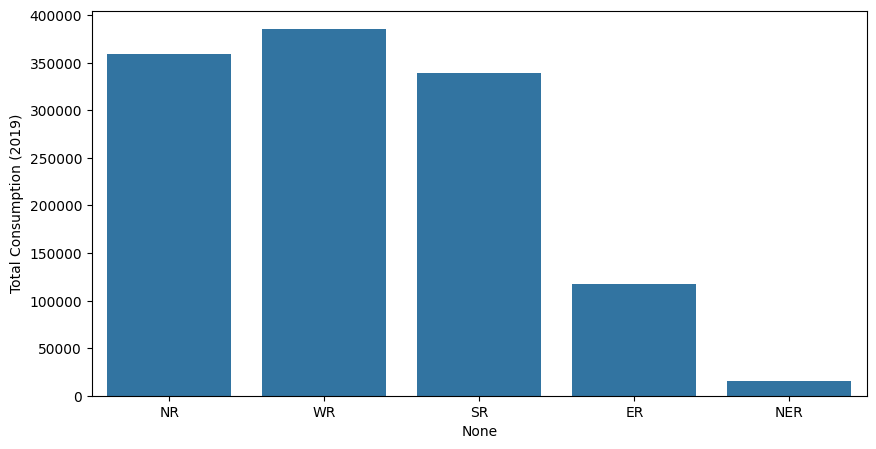

In [7]:
#Plotting the Resultant Dataframes
plt.figure(figsize = (10, 5))
sns.barplot(x = table1.index, y = 'Total Consumption (2019)', data = table1)

<Axes: xlabel='None', ylabel='Total Consumption (2020)'>

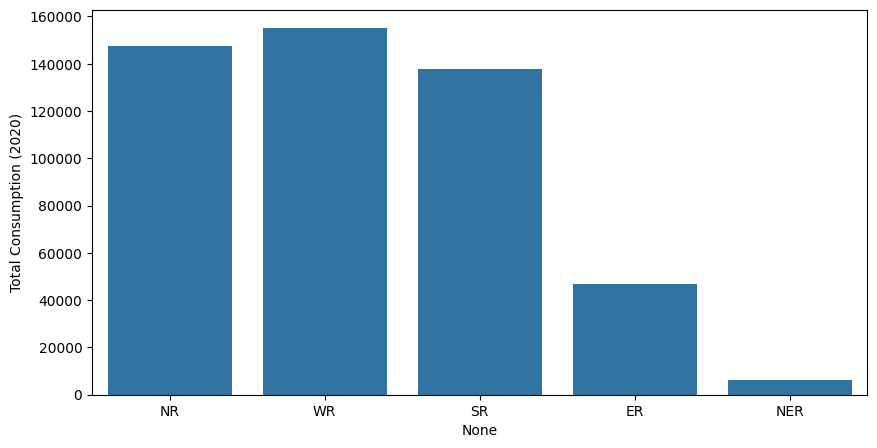

In [8]:
plt.figure(figsize = (10, 5))
sns.barplot(x = table2.index, y = 'Total Consumption (2020)', data = table2)


In [9]:
#Analyzing Consumtion by States
Consumption2019 = dict()
for i in (df2['States'].unique()):
    a = df2[(df2['States'] == i) & (df2['Year'] == 2019)]
    b = a.Usage.sum()
    Consumption2019.update({i : b})

Consumption2020 = dict()
for i in (df2['States'].unique()):
    a = df2[(df2['States'] == i) & (df2['Year'] == 2020)]
    b = a.Usage.sum()
    Consumption2020.update({i : b})


In [10]:
#Creating Dataframes and Renaming Columns
tab3 = pd.DataFrame.from_dict(Consumption2019, orient = 'index')
tab3.rename(columns = {0 : 'Consumption in 2019'}, inplace = True)
tab3.sort_values(by = ['Consumption in 2019'], ascending = False, inplace = True)
tab4 = pd.DataFrame.from_dict(Consumption2020, orient = 'index')
tab4.rename(columns = {0 : 'Consumption in 2020'},inplace = True)
tab4.sort_values(by = ['Consumption in 2020'], ascending = False, inplace = True)

In [11]:
print('Top 10 Consumers in 2019')
tab3.head(10)

Top 10 Consumers in 2019


,Consumption in 2019
Maharashtra,154916.7
Gujarat,115357.4
UP,112689.9
Tamil Nadu,106720.2
Rajasthan,78138.8
MP,74974.6
Karnataka,73076.9
Telangana,67449.6
Andhra Pradesh,63097.0
West Bengal,49868.7


In [12]:
print('Top 10 Consumers in 2020')
tab4.head(10)

Top 10 Consumers in 2020


,Consumption in 2020
Maharashtra,62163.1
Gujarat,47131.5
UP,45270.4
Tamil Nadu,44551.3
Rajasthan,31738.2
MP,29791.8
Karnataka,29588.8
Telangana,26615.7
Andhra Pradesh,25507.4
Punjab,21360.5


Top 10 consumers in 2019


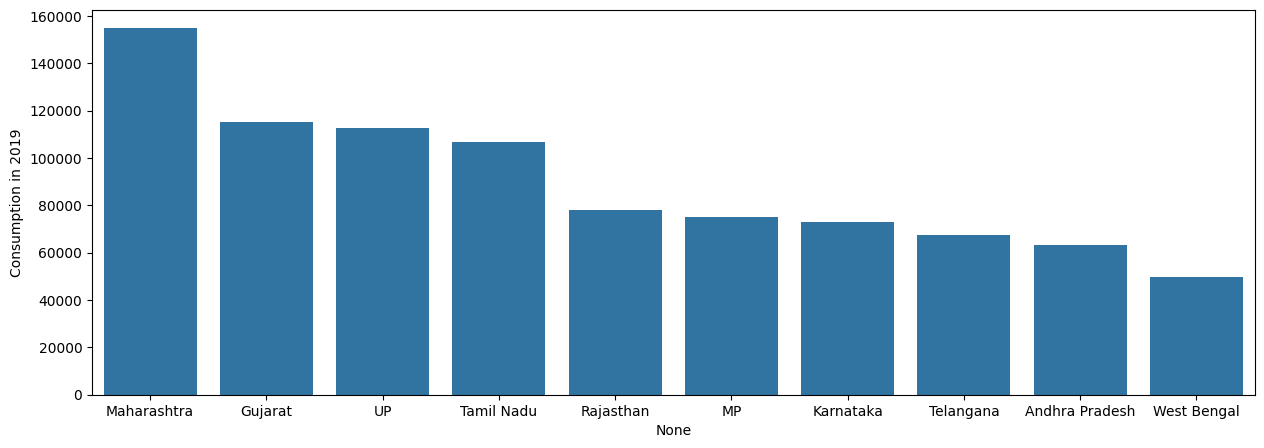

In [13]:
#Visualizing the Top Ten Consumers of 2019
table2019 = tab3.head(10)
plt.figure(figsize = (15, 5))
sns.barplot(y = 'Consumption in 2019', x = table2019.index, data = table2019)
print('Top 10 consumers in 2019')

Top 10 Consumers in 2020


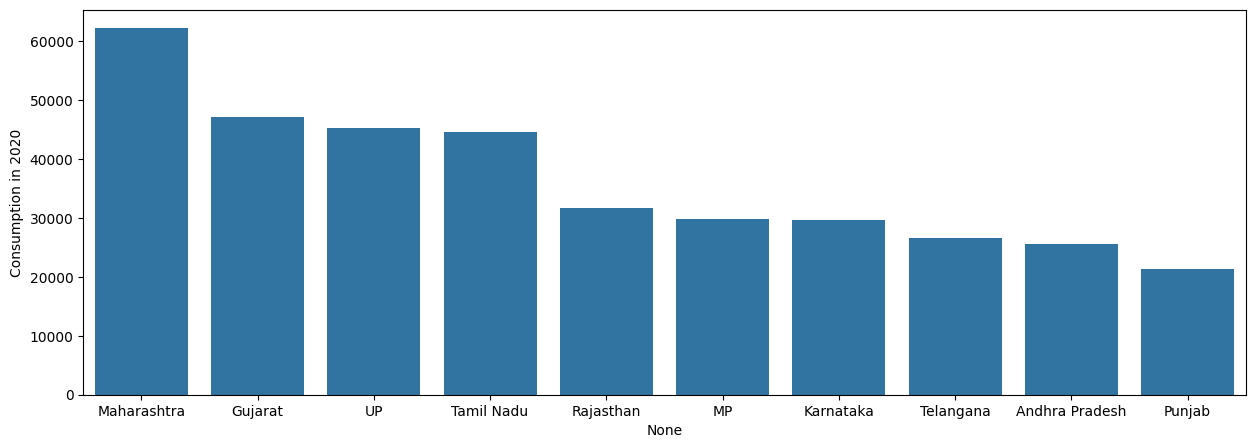

In [14]:
#Visualizing the Top Ten Consumers of 2020
table2020 = tab4.head(10)
plt.figure(figsize = (15, 5))
sns.barplot(y = 'Consumption in 2020', x = table2020.index, data =table2020)
print('Top 10 Consumers in 2020')

Least Consumers of 2019


<Axes: xlabel='None', ylabel='Consumption in 2019'>

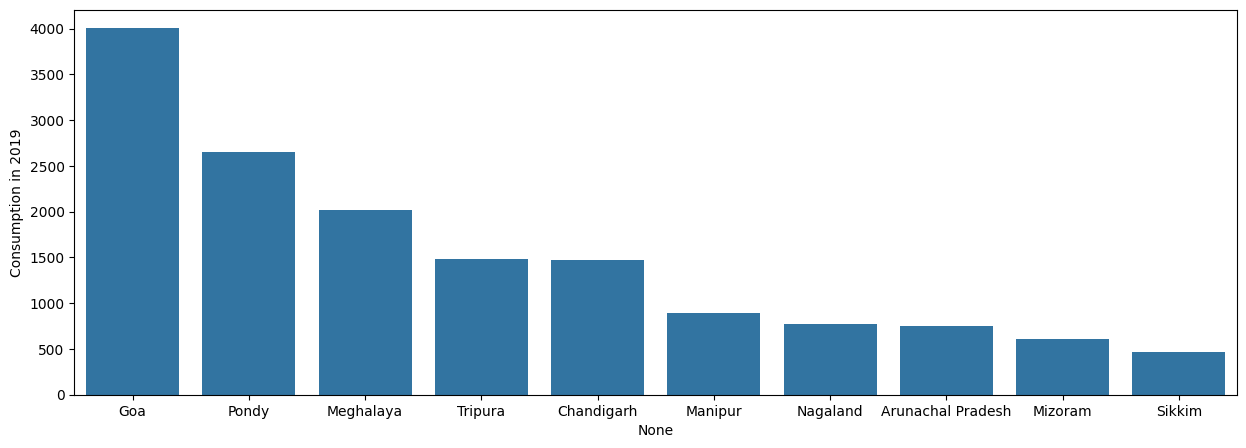

In [15]:
#Visualizing Least Consumers of 2019
print('Least Consumers of 2019')
table_2019 = tab3.tail(10)
plt.figure(figsize = (15, 5))
sns.barplot(y = 'Consumption in 2019', x = table_2019.index, data = table_2019)

Least Consumers of 2020


<Axes: xlabel='None', ylabel='Consumption in 2020'>

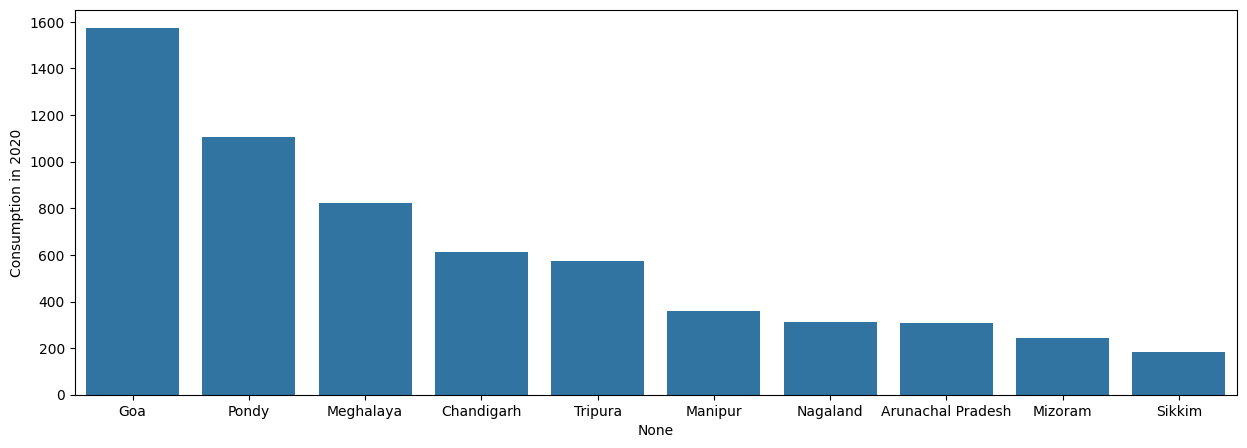

In [16]:
#Visualizing Least Consumers of 2020
print('Least Consumers of 2020')
table_2020 = tab4.tail(10)
table_2020.head()
plt.figure(figsize = (15, 5))
sns.barplot(y = 'Consumption in 2020', x = table_2020.index, data = table_2020)


In [17]:
#Analyzing Consumption by Months
rise2019 = dict()
for i in range(1, 13):
    p = df2[(df2['Month'] == i) & (df2['Year'] == 2019)]
    q = p.Usage.sum()
    rise2019.update({i : q})

rise2020 = dict()
for i in range(1, 13):
    m = df2[(df2['Month'] == i) & (df2['Year'] == 2020)]
    n = m.Usage.sum()
    rise2020.update({i: n})

In [18]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

In [19]:
list2019 = list(rise2019.values())
list2020 = list(rise2020.values())

In [20]:
#Highest and Lowest Consumption Months
A = max(list2019)
B = list2019.index(A)
C = month[B]
D = min(list2019)
E = list2019.index(D)
F = month[E]
G = max(list2020)
H = list2020.index(G)
I = month[H]
J = min(list2020)
K = list2020.index(J)
L = month[K]

highest  consumption is observed in July 2019
minimum consumption is observed in Feb 2019


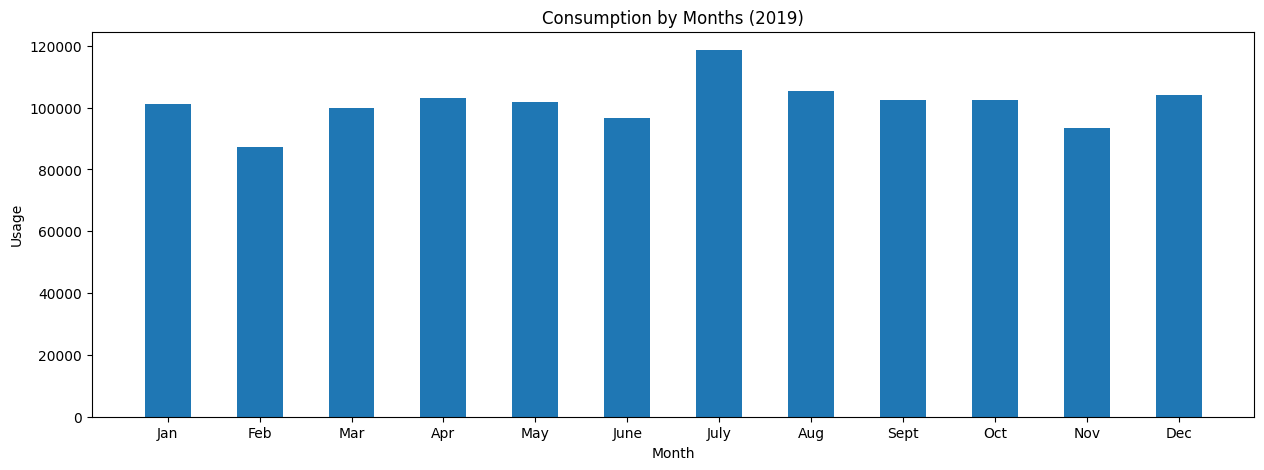

In [21]:
#Visualizing Consumption in 2020 by Months
plt.figure(figsize = (15, 5))
plt.bar(month, list2019, width = 0.5)
print(f'highest  consumption is observed in {C} 2019')
print(f'minimum consumption is observed in {F} 2019')

plt.ylabel('Usage')
plt.xlabel('Month')
plt.title('Consumption by Months (2019)')
plt.show()

highest  consumption is observed in Jan 2020
minimum consumption is observed in June 2020


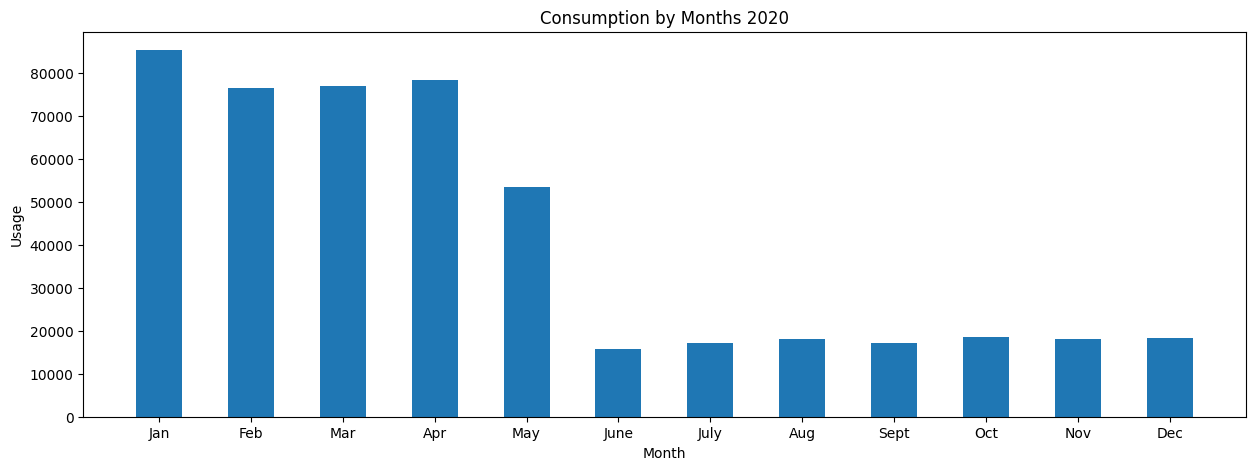

In [22]:
#Visualizing Consumption in 2020 by Months
plt.figure(figsize = (15, 5))
plt.bar(month, list2020, width = 0.5)
print(f'highest  consumption is observed in {I} 2020')
print(f'minimum consumption is observed in {L} 2020')
plt.ylabel('Usage')
plt.xlabel('Month')
plt.title('Consumption by Months 2020')
plt.show()

In [23]:
#Analyzing Consumption Periods, before Lockdown and During Lockdown
print('Total Consumption from March 2019 to May 2019 was :', list2019[2] + list2019[3] + list2019[4])
print('Total Consumption from March 2020 to May 2020 was :', list2020[2] + list2020[3] + list2020[4])
Total_b4 = float(list2019[2] + list2019[3] + list2019[4])
Total_dur = float(list2020[2] + list2020[3] +list2020[4])
difference = Total_b4 - Total_dur
print('The differnce in Consumption was :', difference)

Total Consumption from March 2019 to May 2019 was : 304712.4
Total Consumption from March 2020 to May 2020 was : 208813.7
The differnce in Consumption was : 95898.70000000001


In [24]:
#Visualizing the two Consumption Periods
list_total = []
list_total.append(Total_b4)
list_period = []
list_total.append(Total_dur)
list_period.append('Before lockdown')
list_period.append('During lockdown')

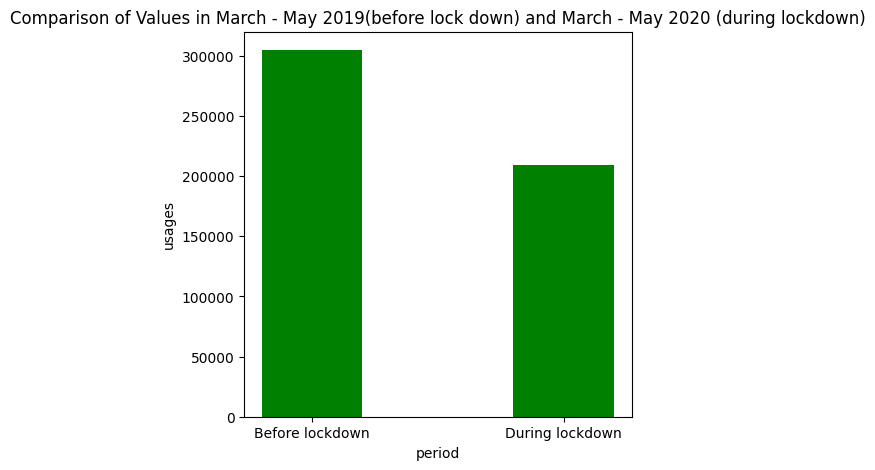

In [25]:
plt.figure(figsize = (5, 5))
plt.bar(list_period, list_total, color = 'green',
        width = 0.4)

plt.xlabel("period")
plt.ylabel("usages")
plt.title("Comparison of Values in March - May 2019(before lock down) and March - May 2020 (during lockdown)")
plt.show()